# Zoom

In [1]:
import stackview
from skimage.io import imread, imshow
from skimage.filters import gaussian, threshold_otsu, sobel
from skimage.measure import label

In [2]:
image = imread('data/Haase_MRT_tfl3d1.tif')[:,80:120,:40]

StackViewNDArray([[[   0, 1297,  458, ...,  992, 1221, 1755],
                   [   0,  839,  534, ..., 2441, 1679, 1297],
                   [   0, 2060, 2060, ...,  839,  610,  687],
                   ...,
                   [   0,    0,  992, ..., 1221, 1526, 2289],
                   [   0,    0, 1297, ..., 1297, 1144, 2213],
                   [   0,    0, 1068, ..., 1679, 1831, 1679]],

                  [[   0,  916,  763, ...,  763, 1144, 1984],
                   [   0, 1221,  992, ..., 1679,  916, 1450],
                   [   0,  916,  992, ..., 1144,  992, 1679],
                   ...,
                   [   0,    0, 2060, ..., 1984, 1831,  687],
                   [   0,    0, 1907, ...,  992, 2060,  916],
                   [   0,    0, 1755, ..., 1144, 2670, 1068]],

                  [[   0,  763,  916, ..., 1450,  839, 1221],
                   [   0, 1679,  992, ...,  534,  610,  763],
                   [   0,  305, 1602, ...,  839, 3052, 1907],
                   ...,
                   [   0,    0,  305, ..., 1831, 2213, 2213],
                   [   0,    0,  916, ...,  763, 1068, 2289],
                   [   0,    0, 1221, ..., 1450,  610, 2823]],

                  ...,

                  [[   0,  763, 1373, ..., 1526, 2899, 1297],
                   [   0,  763,  992, ..., 1297,  763, 1602],
                   [   0,  992,  534, ..., 1679,  534, 2289],
                   ...,
                   [   0,    0, 1221, ...,  839,  534,  687],
                   [   0,    0,  305, ...,  916, 1907,  839],
                   [   0,    0,  992, ..., 1221, 1144, 1907]],

                  [[   0,  458,  763, ..., 2747, 1602,  763],
                   [   0,  458, 1068, ...,  763,  763, 1984],
                   [   0,  763, 1602, ..., 1297, 1450, 1221],
                   ...,
                   [   0,    0,  992, ...,  534, 1907, 1144],
                   [   0,    0,  839, ..., 1373, 1984, 1373],
                   [   0,    0,  839, ..., 1526, 1221, 1373]],

                  [[   0,  458, 1297, ...,  992, 2365, 2136],
                   [   0,  381, 1068, ...,  687, 1526, 1373],
                   [   0,  534, 1068, ..., 1907, 1373,  305],
                   ...,
                   [   0,    0, 1602, ...,  916,  458,  534],
                   [   0,    0, 1602, ..., 1144, 1526,  534],
                   [   0,    0,  839, ..., 1068, 1907, 1144]]],
                 dtype=uint16)
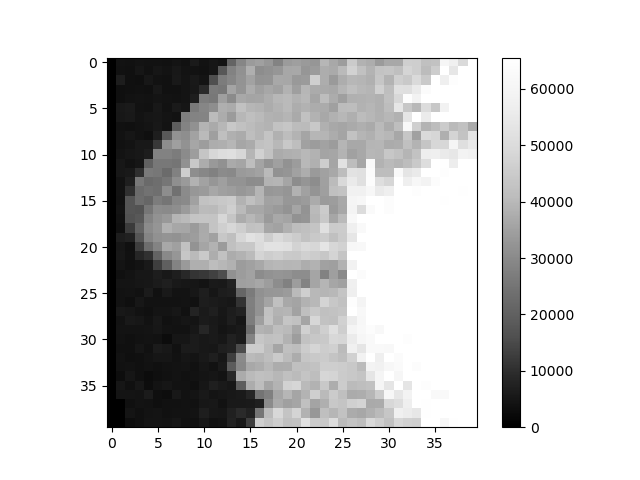
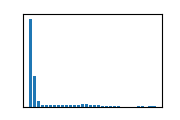

In [3]:
stackview.insight(image)

When working with small images, the view may be suboptimal.

In [4]:
stackview.slice(image)

Thus, you can provide a `zoom_factor`.

In [5]:
stackview.slice(image, zoom_factor=10)

This also works with other tools such as the `picker`.

In [6]:
stackview.picker(image, zoom_factor=10)

If you don't like the neareast-neighbor interpolation, you can also specify a higher order of the spline-interpolation used under the hood.

In [7]:
stackview.picker(image, zoom_factor=10, zoom_spline_order=3)

Some more zoomed views to check if `stackview` tools work.

In [8]:
stackview.curtain(image, 256-image, zoom_factor=10, continuous_update=True)

In [9]:
blobs = imread('data/blobs.tif')

stackview.picker(label(blobs > 120), zoom_factor=2)

In [10]:
stackview.side_by_side(blobs, label(blobs > 120), zoom_factor=0.5, continuous_update=True)

In [11]:
def my_custom_code(image, sigma:float = 1, show_labels: bool = True):
    sigma = abs(sigma)
    blurred_image = gaussian(image, sigma=sigma)
    binary_image = blurred_image > threshold_otsu(blurred_image)
    edge_image = sobel(binary_image)
    
    if show_labels:
        return label(binary_image)
    else:
        return edge_image * image.max() + image 

stackview.interact(my_custom_code, blobs, zoom_factor=10)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='sigma', max=10.0, step=1.0)…